# Traditional dance

In [1]:
# uploading required files 
from google.colab import files 
a = files.upload()

In [1]:
import pandas as pd
import numpy as np

In [14]:
#reading the dataset
train_df = pd.read_csv("/content/drive/MyDrive/dataset/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/dataset/test.csv")

## Data Pre-processing

In [15]:
train_df.sample(5)

,Image,target
263,229.jpg,kathakali
66,104.jpg,manipuri
245,428.jpg,kuchipudi
23,384.jpg,kuchipudi
290,403.jpg,kuchipudi


In [16]:
test_df.sample(5)

,Image
95,146.jpg
7,196.jpg
64,346.jpg
16,479.jpg
9,467.jpg


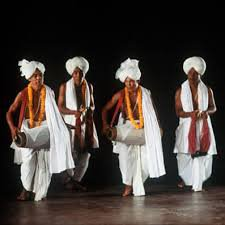

(225, 225, 3)



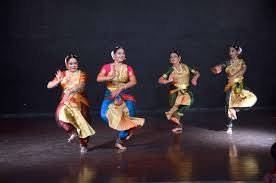

(183, 276, 3)



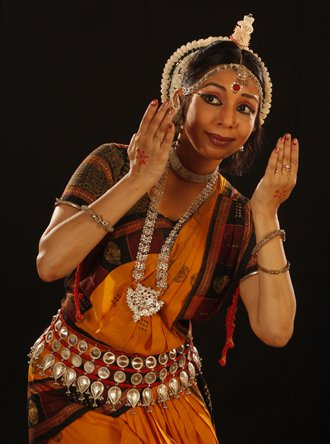

(444, 330, 3)



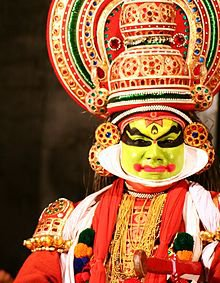

(283, 220, 3)



In [22]:
from google.colab.patches import cv2_imshow
import cv2
for image in range(4):
  img = cv2.imread("/content/drive/MyDrive/dataset/train/" + str(train_df['Image'][image]))
  cv2_imshow(img)
# print(img)
  print(img.shape)
  print()

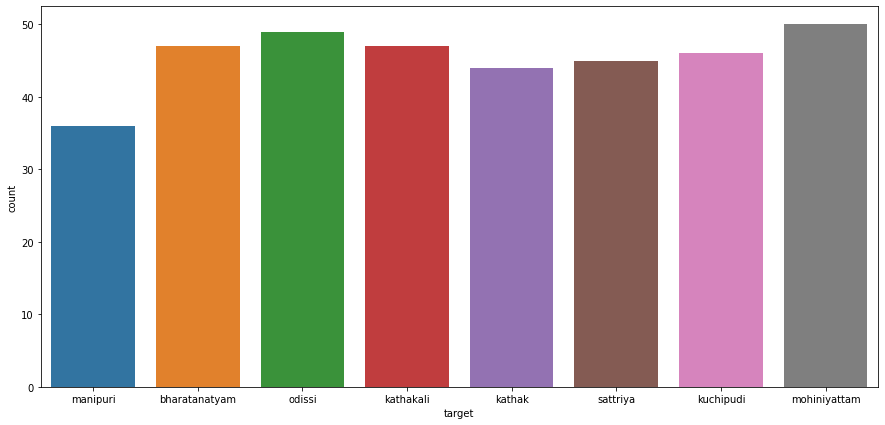

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,7))
sns.countplot(x='target', data=train_df)

In [28]:
train_df['target'].value_counts()

mohiniyattam     50
odissi           49
bharatanatyam    47
kathakali        47
kuchipudi        46
sattriya         45
kathak           44
manipuri         36
Name: target, dtype: int64

## Preparing data for training

In [29]:
from sklearn.model_selection import train_test_split
train, validate = train_test_split(train_df, test_size=0.25, random_state=4)

train.shape, validate.shape

((273, 2), (91, 2))

In [30]:
train['target'].value_counts()

mohiniyattam     39
odissi           37
kuchipudi        36
sattriya         35
bharatanatyam    34
kathak           33
kathakali        32
manipuri         27
Name: target, dtype: int64

In [31]:
validate['target'].value_counts()

kathakali        15
bharatanatyam    13
odissi           12
kathak           11
mohiniyattam     11
sattriya         10
kuchipudi        10
manipuri          9
Name: target, dtype: int64

## Building the model

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import activations, layers


In [33]:
clf = Sequential()

clf.add(Conv2D(32, (3,3), input_shape=(128,128,3), activation='relu'))
clf.add(BatchNormalization())
clf.add(layers.Activation('relu'))
clf.add(MaxPooling2D(pool_size=(2,2)))
clf.add(Dropout(0.5))

clf.add(Conv2D(64, (3,3), activation='relu'))
clf.add(BatchNormalization())
clf.add(layers.Activation('relu'))
clf.add(MaxPooling2D(pool_size=(2,2)))
clf.add(Dropout(0.5))

clf.add(Conv2D(128, (3,3), activation='relu'))
clf.add(MaxPooling2D(pool_size=(2,2)))
clf.add(Dropout(0.5))

clf.add(Flatten())
clf.add(Dense(units=128, activation='relu'))
clf.add(Dropout(0.5))
clf.add(Dense(units=8, activation='softmax'))

In [34]:
clf.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
activation (Activation)      (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        2

In [35]:
"""# What id Image Data Generator ?
Image data augmentation is typically only applied to the training dataset, 
and not to the validation or test dataset. 
This is different from data preparation such as image resizing and pixel scaling; 
they must be performed consistently across all datasets that interact with the model
"""

'# What id Image Data Generator ?\nImage data augmentation is typically only applied to the training dataset, \nand not to the validation or test dataset. \nThis is different from data preparation such as image resizing and pixel scaling; \nthey must be performed consistently across all datasets that interact with the model\n'

In [36]:
from keras.preprocessing.image import ImageDataGenerator

train_image_data = ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True)

val_image_data = ImageDataGenerator(rescale = 1./255)

In [37]:
train_gen = train_image_data.flow_from_dataframe(
    dataframe = train, 
    directory = '/content/drive/MyDrive/dataset/train',
    x_col = "Image",
    y_col = 'target',
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True,
    target_size = (128, 128))

Found 273 validated image filenames belonging to 8 classes.


In [38]:
test_gen = val_image_data.flow_from_dataframe(
    dataframe = validate, 
    directory = '/content/drive/MyDrive/dataset/train',
    x_col = "Image",
    y_col = 'target',
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True,
    target_size = (128, 128))

Found 91 validated image filenames belonging to 8 classes.


## Training the model

In [41]:
model = clf.fit(train_gen, validation_data=test_gen, epochs=100)

Epoch 1/100
9/9 [==============================] - 3s 364ms/step - loss: 2.0491 - accuracy: 0.1685 - val_loss: 2.0791 - val_accuracy: 0.1209
Epoch 2/100
9/9 [==============================] - 3s 335ms/step - loss: 2.0415 - accuracy: 0.1429 - val_loss: 2.0795 - val_accuracy: 0.1209
Epoch 3/100
9/9 [==============================] - 3s 354ms/step - loss: 2.0177 - accuracy: 0.2234 - val_loss: 2.0799 - val_accuracy: 0.1209
Epoch 4/100
9/9 [==============================] - 3s 350ms/step - loss: 2.0236 - accuracy: 0.2015 - val_loss: 2.0801 - val_accuracy: 0.1209
Epoch 5/100
9/9 [==============================] - 3s 330ms/step - loss: 1.9934 - accuracy: 0.2454 - val_loss: 2.0801 - val_accuracy: 0.1209
Epoch 6/100
9/9 [==============================] - 3s 312ms/step - loss: 1.9622 - accuracy: 0.2381 - val_loss: 2.0793 - val_accuracy: 0.1209
Epoch 7/100
9/9 [==============================] - 3s 368ms/step - loss: 2.0000 - accuracy: 0.2234 - val_loss: 2.0794 - val_accuracy: 0.1209
Epoch 8/100
9

In [42]:
# saving the weights
clf.evaluate_generator(generator=test_gen)
clf.save('trained_model.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


## Accuracy graph

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


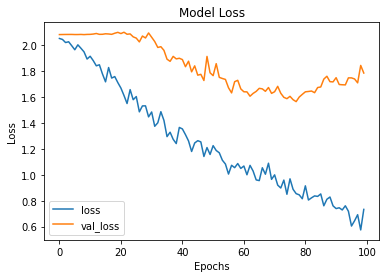

In [45]:
print(model.history.keys())

plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['loss', 'val_loss'], loc='lower left')